In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [81]:
df = pd.read_csv('datafolder/final.csv')
df.drop('prices', inplace=True, axis=1)
df.describe()

,prices_t1,prices_t2,sales,sales_t1,sales_t2,weather,weather_t1,weather_t2,gdp,mom1,...,mom3_t2,mom4,mom4_t1,mom4_t2,population,longitude,latitude,month,year,y
count,13728.000000,13728.000000,1.372800e+04,1.372800e+04,1.372800e+04,13728.000000,13728.000000,13728.000000,1.372800e+04,13728.000000,...,13728.000000,13728.000000,13728.000000,13728.000000,1.372800e+04,13728.000000,13728.000000,13728.000000,13728.000000,13728.000000
mean,9.219559,9.202248,2.089440e+06,2.085484e+06,2.085301e+06,52.676552,52.694143,52.678030,2.244319e+05,9.235244,...,13.789496,116.435976,115.406537,114.994464,6.726206e+06,-91.112058,39.402989,6.534965,2001.580420,9.250209
std,2.782238,2.777662,2.095183e+06,2.092103e+06,2.091809e+06,17.327157,17.306984,17.322294,2.846136e+05,1.492597,...,9.319222,93.919909,93.407125,93.599451,7.335017e+06,14.785496,4.619242,3.438468,6.879237,2.793090
min,4.180000,4.180000,1.050110e+05,1.050110e+05,1.050110e+05,-2.500000,-2.500000,-2.500000,1.150900e+04,7.292083,...,-0.143818,13.382967,13.382967,12.636618,5.793150e+05,-122.070938,27.766279,1.000000,1990.000000,4.180000
25%,7.220000,7.210000,6.137960e+05,6.110992e+05,6.110020e+05,39.500000,39.500000,39.500000,5.637800e+04,8.048750,...,8.145849,57.417351,57.298409,57.027966,2.046072e+06,-99.525124,35.718400,4.000000,1996.000000,7.240000
50%,8.540000,8.520000,1.545816e+06,1.541950e+06,1.541950e+06,53.800000,53.800000,53.800000,1.321670e+05,8.536979,...,10.768921,77.156412,77.049940,76.321492,4.779540e+06,-89.301322,39.999729,7.000000,2002.000000,8.560000
75%,10.790000,10.770000,2.778356e+06,2.771852e+06,2.771852e+06,67.000000,67.000000,67.000000,2.699370e+05,10.687292,...,17.376736,143.166312,142.058979,142.058979,7.671812e+06,-79.397306,42.898629,10.000000,2008.000000,10.830000
max,22.010000,22.010000,1.862066e+07,1.862066e+07,1.862066e+07,89.200000,89.200000,89.200000,2.223892e+06,12.487083,...,51.373037,565.598675,565.598675,565.598675,3.953665e+07,-69.381927,47.528912,12.000000,2013.000000,22.010000


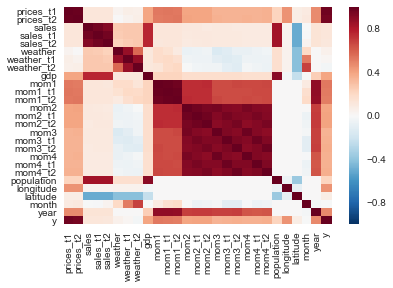

In [101]:
sns.heatmap(df.corr())
plt.savefig('images//correlationplot.png')

# Plotting prices

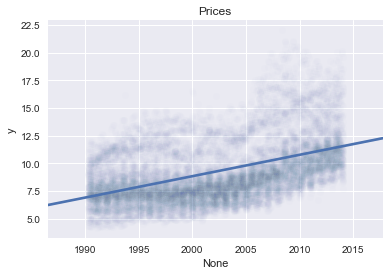

In [99]:
x = df['year'] + (df['month']/12)
sns.regplot(x, df['y'], scatter_kws= {'alpha': 0.01})
plt.title('Prices')
plt.savefig('images//prices_reg_plot.png')

# Data cleaning

In [22]:
sc = StandardScaler()
lp = sc.fit_transform(X = df['prices_t1'].values.reshape(-1,1))
X = sc.fit_transform(X = df.drop('y', axis=1))
y = sc.fit_transform(X = df['y'].values.reshape(-1,1))

In [23]:
class ScaleBack(object):
    
    def __init__(self, mean, std):
        
        self.mean = mean
        self.std = std
        
    def scale_back(self, array):
        
        return (array * self.std) + self.mean
        
np.mean(df['y']), np.std(df['y'])

(9.250209061771562, 2.7929882144026332)

In [24]:
sb = ScaleBack(np.mean(df['y']), np.std(df['y']))

# Principal Component analysis

In [25]:
pca = PCA(n_components=4)

In [26]:
X_new = pca.fit_transform(X)

In [27]:
df_new = pd.DataFrame(X_new,columns=['Eigen1', 'Eigen2', 'Eigen3', 'Eigen4'])

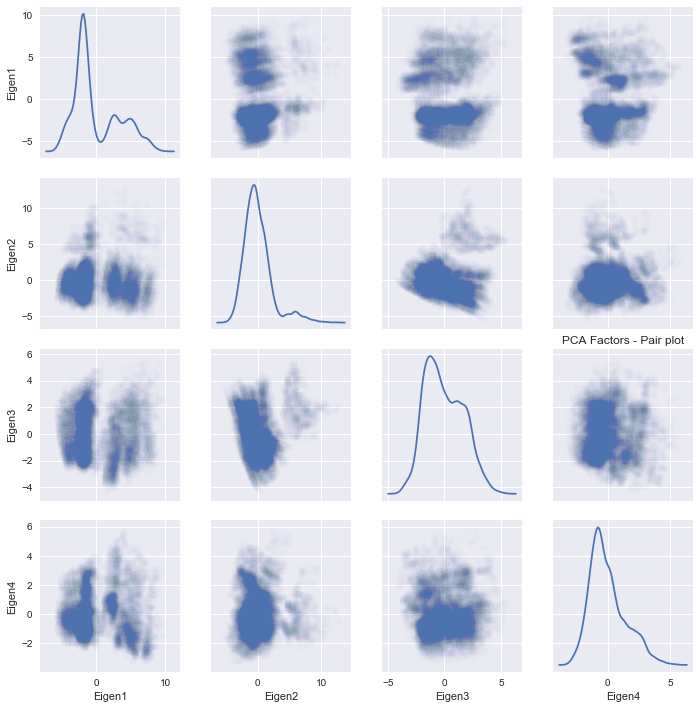

In [98]:
sns.pairplot(df_new, plot_kws= {'alpha': 0.01}, diag_kind='kde')
plt.title('PCA Factors - Pair plot')
plt.savefig('images//pairplot.png')

# Splitting data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
X_train_val, X_val_val, y_train_val, y_val_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

In [31]:
def error_term(y, y_hat):
    
    return y - y_hat.reshape(-1,1)

def mse(y, y_hat):
    
    return np.mean(error_term(y, y_hat)**2)

def mae(y, y_hat):
    
    return np.mean((error_term(y, y_hat)**2)**(1/2))

# Last Period prediction

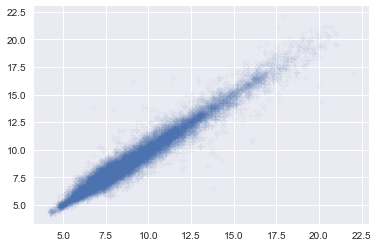

In [32]:
plt.scatter(sb.scale_back(y), sb.scale_back(lp), alpha=0.04, marker='+')

In [33]:
mse_lp = mse(sb.scale_back(y), sb.scale_back(lp))
mae_lp = mae(sb.scale_back(y), sb.scale_back(lp))

# Linear regression

In [34]:
linreg = LinearRegression()

In [35]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
linreg_pred = linreg.predict(X_test)

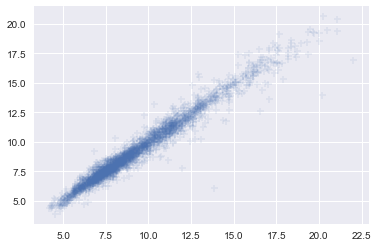

In [37]:
plt.scatter(sb.scale_back(y_test), sb.scale_back(linreg_pred), alpha=0.09, marker='+')

In [38]:
mse_linreg = mse(sb.scale_back(linreg_pred), sb.scale_back(y_test))
mae_linreg = mae(sb.scale_back(linreg_pred), sb.scale_back(y_test))

# Random Forrest

In [39]:
forest = RandomForestRegressor()

In [40]:
forest.fit(X_train,y_train)

/Users/Jeppe/anaconda3/envs/ztdl/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [41]:
forest_pred = forest.predict(X_test)

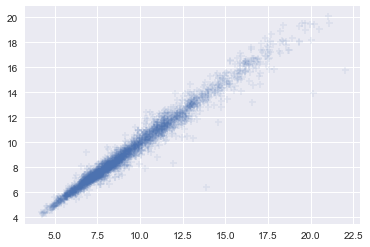

In [42]:
plt.scatter(sb.scale_back(y_test), sb.scale_back(forest_pred), alpha=0.09, marker='+')

In [43]:
mse_forest = mse(sb.scale_back(y_test), sb.scale_back(forest_pred))
mae_forest = mae(sb.scale_back(y_test), sb.scale_back(forest_pred))

In [44]:
X_train.shape

(10982, 26)

# Deep Learning model

In [73]:
model = Sequential()
model.add(Dense(16, input_shape=(26,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed=4))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='linear'))
model.compile(Adam(lr=0.05),
              loss='mse',
              metrics=['accuracy'])

In [74]:
model.fit(X_train, y_train, epochs=30, verbose=2, validation_split=0.1)

Train on 9883 samples, validate on 1099 samples
Epoch 1/30
3s - loss: 0.2005 - acc: 0.0000e+00 - val_loss: 0.0672 - val_acc: 0.0000e+00
Epoch 2/30
2s - loss: 0.1357 - acc: 0.0000e+00 - val_loss: 0.0718 - val_acc: 0.0000e+00
Epoch 3/30
2s - loss: 0.1265 - acc: 0.0000e+00 - val_loss: 0.0875 - val_acc: 0.0000e+00
Epoch 4/30
2s - loss: 0.1197 - acc: 0.0000e+00 - val_loss: 0.1555 - val_acc: 0.0000e+00
Epoch 5/30
2s - loss: 0.1229 - acc: 0.0000e+00 - val_loss: 0.0516 - val_acc: 0.0000e+00
Epoch 6/30
2s - loss: 0.1289 - acc: 0.0000e+00 - val_loss: 0.1088 - val_acc: 0.0000e+00
Epoch 7/30
2s - loss: 0.1111 - acc: 0.0000e+00 - val_loss: 0.1239 - val_acc: 0.0000e+00
Epoch 8/30
2s - loss: 0.1077 - acc: 0.0000e+00 - val_loss: 0.0795 - val_acc: 0.0000e+00
Epoch 9/30
2s - loss: 0.1192 - acc: 0.0000e+00 - val_loss: 0.0936 - val_acc: 0.0000e+00
Epoch 10/30
2s - loss: 0.1148 - acc: 0.0000e+00 - val_loss: 0.0450 - val_acc: 0.0000e+00
Epoch 11/30
2s - loss: 0.1113 - acc: 0.0000e+00 - val_loss: 0.0605 - va

In [75]:
deep_pred = model.predict(X_test)

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                432       
_________________________________________________________________
batch_normalization_8 (Batch (None, 16)                64        
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
batch_normalization_9 (Batch (None, 16)                64        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                170       
_________________________________________________________________
batch_normalization_10 (Batc (None, 10)                40        
__________

In [77]:
mse_deep = mse(sb.scale_back(y_test), sb.scale_back(deep_pred))
mae_deep = mae(sb.scale_back(y_test), sb.scale_back(deep_pred))

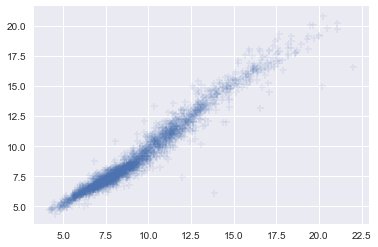

In [78]:
plt.scatter(sb.scale_back(y_test), sb.scale_back(deep_pred), alpha=0.09, marker='+')

In [104]:
df = pd.DataFrame({'model': ['last periods price', 'Linear Regression', 'Random Forest', 'Deep Learning'],
              'Mean squared Error' : [mse_lp, mse_linreg, mse_forest, mse_deep], 
              'Mean Absolute Error': [mae_lp, mae_linreg, mae_forest, mae_deep]})
df.set_index('model')
df.to_csv('images//results')

In [105]:
df

,Mean Absolute Error,Mean squared Error,model
0,0.453637,0.422777,last periods price
1,0.370051,0.319690,Linear Regression
2,0.315383,0.253573,Random Forest
3,0.455556,0.398728,Deep Learning


# Plot

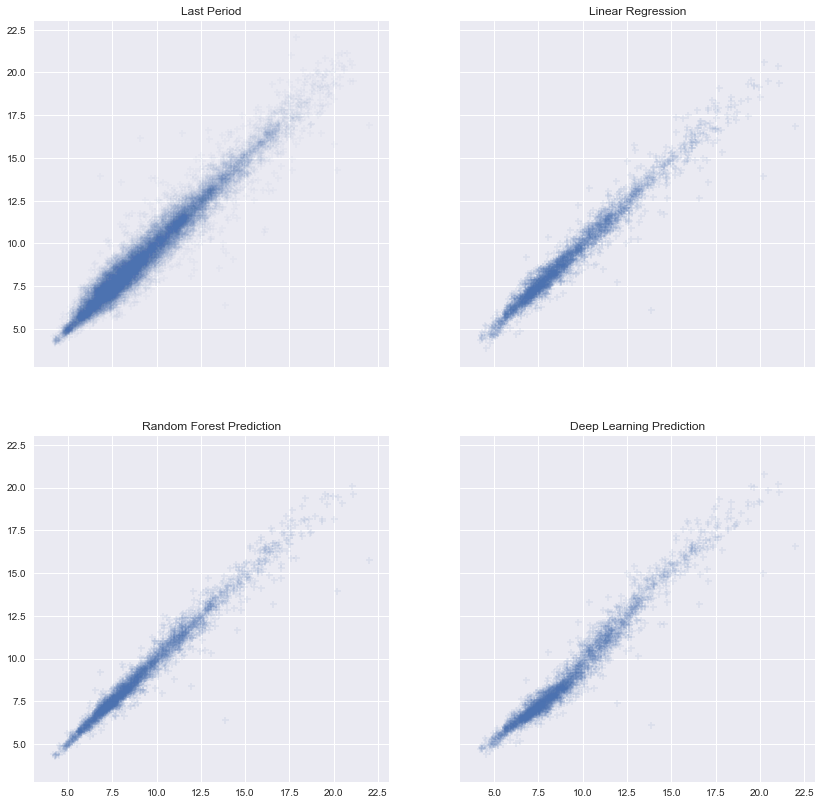

In [97]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2 ,sharex = True, sharey =True, figsize = (14,14))
ax1.scatter(sb.scale_back(y), sb.scale_back(lp), alpha=0.04, marker='+')
ax2.scatter(sb.scale_back(y_test), sb.scale_back(linreg_pred), alpha=0.09, marker='+')
ax3.scatter(sb.scale_back(y_test), sb.scale_back(forest_pred), alpha=0.09, marker='+')
ax4.scatter(sb.scale_back(y_test), sb.scale_back(deep_pred), alpha=0.09, marker='+')

ax1.set_title('Last Period')
ax2.set_title('Linear Regression')
ax3.set_title('Random Forest Prediction')
ax4.set_title('Deep Learning Prediction')
f.savefig('images//predictions.png')